In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

# Вводная информация по проекту:

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

Ниже вы найдете пошаговую инструкцию по выполнению проекта.

## Описание датасета

Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

In [68]:
# Давайте взглянем на датафрейм, с которым нам предстоит работать
stud_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [69]:
stud_math.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [70]:
# Для удобства переименуем названия столбцов, просто переведём их в нижний регистр

columns_list = stud_math.columns.tolist()
columns_list = [x.lower() for x in columns_list]
stud_math.columns = columns_list

In [71]:
# Сразу бросается в глаза, что у нас есть один столбец (studytime, granular), которого нет в описании
# Посмотрим, что он из себя представляет

display(stud_math['studytime, granular'].head())

0   -6.0
1   -6.0
2   -6.0
3   -9.0
4   -6.0
Name: studytime, granular, dtype: float64

In [72]:
# Пока ничего не понятно. Давайте взглянем, как он коррелирует с другими столбцами

stud_math.corr()

,age,medu,fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


In [73]:
# Видим, что со столбцом studytime есть прямая корреляция. Изучим подробнее

stud_math[['studytime', 'studytime, granular']].head(50)

,studytime,"studytime, granular"
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
5,2.0,-6.0
6,2.0,-6.0
7,2.0,-6.0
8,2.0,-6.0
9,2.0,-6.0


In [74]:
# Кажется, studytime, granular содержит значения столбца studytime, умноженные на -3
# Может быть, для кого-то это полезная информация, но точно не для нас. Удалим его.

stud_math.drop(['studytime, granular'], inplace=True, axis=1)

In [75]:
# Теперь посмотрим на типы данных в столбцах и на количество пустых значений
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   pstatus     350 non-null    object 
 6   medu        392 non-null    float64
 7   fedu        371 non-null    float64
 8   mjob        376 non-null    object 
 9   fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

In [76]:
# Разделим наш датафрейм временно на два дополнительных. Один будет содержать
# числовые признаки, другой - номинативные.

# Отбор числовых колонок

df_numeric = stud_math.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
display(numeric_cols)

# Отбор нечисловых колонок

df_non_numeric = stud_math.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
display(non_numeric_cols)

array(['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'score'],
      dtype=object)

array(['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'], dtype=object)

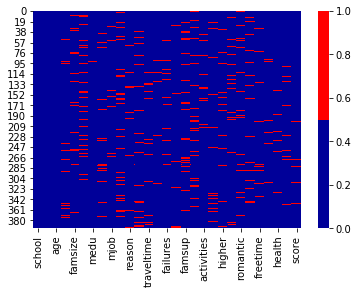

In [77]:
# Отобразим пропущенные данные на тепловой карте
# Красный - пропущенные данные, синий - не пропущенные

colours = ['#000099', '#ff0000']
sns.heatmap(stud_math.isnull(), cmap=sns.color_palette(colours))

In [78]:
# На тепловой карте мы можем увидеть, что пропущенных данных довольно много.
# Давайте попробуем взглянуть на пропуски в процентном соотношении.

for col in stud_math.columns:
    pct_missing = np.mean(stud_math[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.0%
famsize - 7.0%
pstatus - 11.0%
medu - 1.0%
fedu - 6.0%
mjob - 5.0%
fjob - 9.0%
reason - 4.0%
guardian - 8.0%
traveltime - 7.0%
studytime - 2.0%
failures - 6.0%
schoolsup - 2.0%
famsup - 10.0%
paid - 10.0%
activities - 4.0%
nursery - 4.0%
higher - 5.0%
internet - 9.0%
romantic - 8.0%
famrel - 7.0%
freetime - 3.0%
goout - 2.0%
health - 4.0%
absences - 3.0%
score - 2.0%


Создан индикатор для пропущенных значений: address
Создан индикатор для пропущенных значений: famsize
Создан индикатор для пропущенных значений: pstatus
Создан индикатор для пропущенных значений: medu
Создан индикатор для пропущенных значений: fedu
Создан индикатор для пропущенных значений: mjob
Создан индикатор для пропущенных значений: fjob
Создан индикатор для пропущенных значений: reason
Создан индикатор для пропущенных значений: guardian
Создан индикатор для пропущенных значений: traveltime
Создан индикатор для пропущенных значений: studytime
Создан индикатор для пропущенных значений: failures
Создан индикатор для пропущенных значений: schoolsup
Создан индикатор для пропущенных значений: famsup
Создан индикатор для пропущенных значений: paid
Создан индикатор для пропущенных значений: activities
Создан индикатор для пропущенных значений: nursery
Создан индикатор для пропущенных значений: higher
Создан индикатор для пропущенных значений: internet
Создан индикатор для пропущенных зна

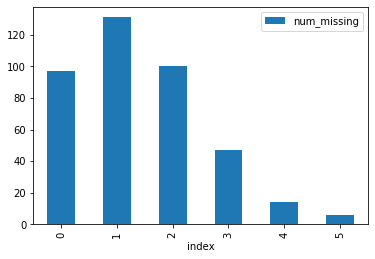

In [79]:
# Создадим индикатор для признаков с пропущенными данными

for col in stud_math.columns:
    missing = stud_math[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        print('Создан индикатор для пропущенных значений: {}'.format(col))
        stud_math['{}_ismissing'.format(col)] = missing


# Построим гистограмму на основе индикатора

ismissing_cols = [col for col in stud_math.columns if 'ismissing' in col]
stud_math['num_missing'] = stud_math[ismissing_cols].sum(axis=1)

stud_math['num_missing'].value_counts().reset_index(
).sort_values(by='index').plot.bar(x='index')

In [80]:
# Почти 100 строк у нас не имеют пустот, 130 строк с одним пустым значением,
# 100 - с двумя, 50 - с тремя, 15 - с четыремя, 5 - с пятью.

In [81]:
# Отбросим строки, имеющие более трёх недостающих признаков
# Так мы избавимся от строк, которые уведут наш анализ в неправильное русло,
# и не сильно потеряем в количестве оставшихся значений.

ind_missing = stud_math[stud_math['num_missing'] > 3].index
stud_math = stud_math.drop(ind_missing, axis=0)

In [82]:
# Уберём вспомогательные столбцы, которые мы создали ранее

for col in stud_math.columns:
    if 'missing' in col:
        stud_math.drop(col, axis='columns', inplace=True)

In [83]:
# Разберем числовые данные, заполним пустые значения медианой.

median_absences = stud_math.absences.median()
stud_math.absences = stud_math.absences.fillna(median_absences)

median_score = stud_math.score.median()
stud_math.score = stud_math.score.fillna(median_score)

In [84]:
# Заполним пустые значения оставшихся признаков модой.

for col in stud_math.columns:
    col_mode = stud_math[col].mode().iloc[0]
    stud_math[col] = stud_math[col].fillna(col_mode)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002558C514EC8>,
      dtype=object)

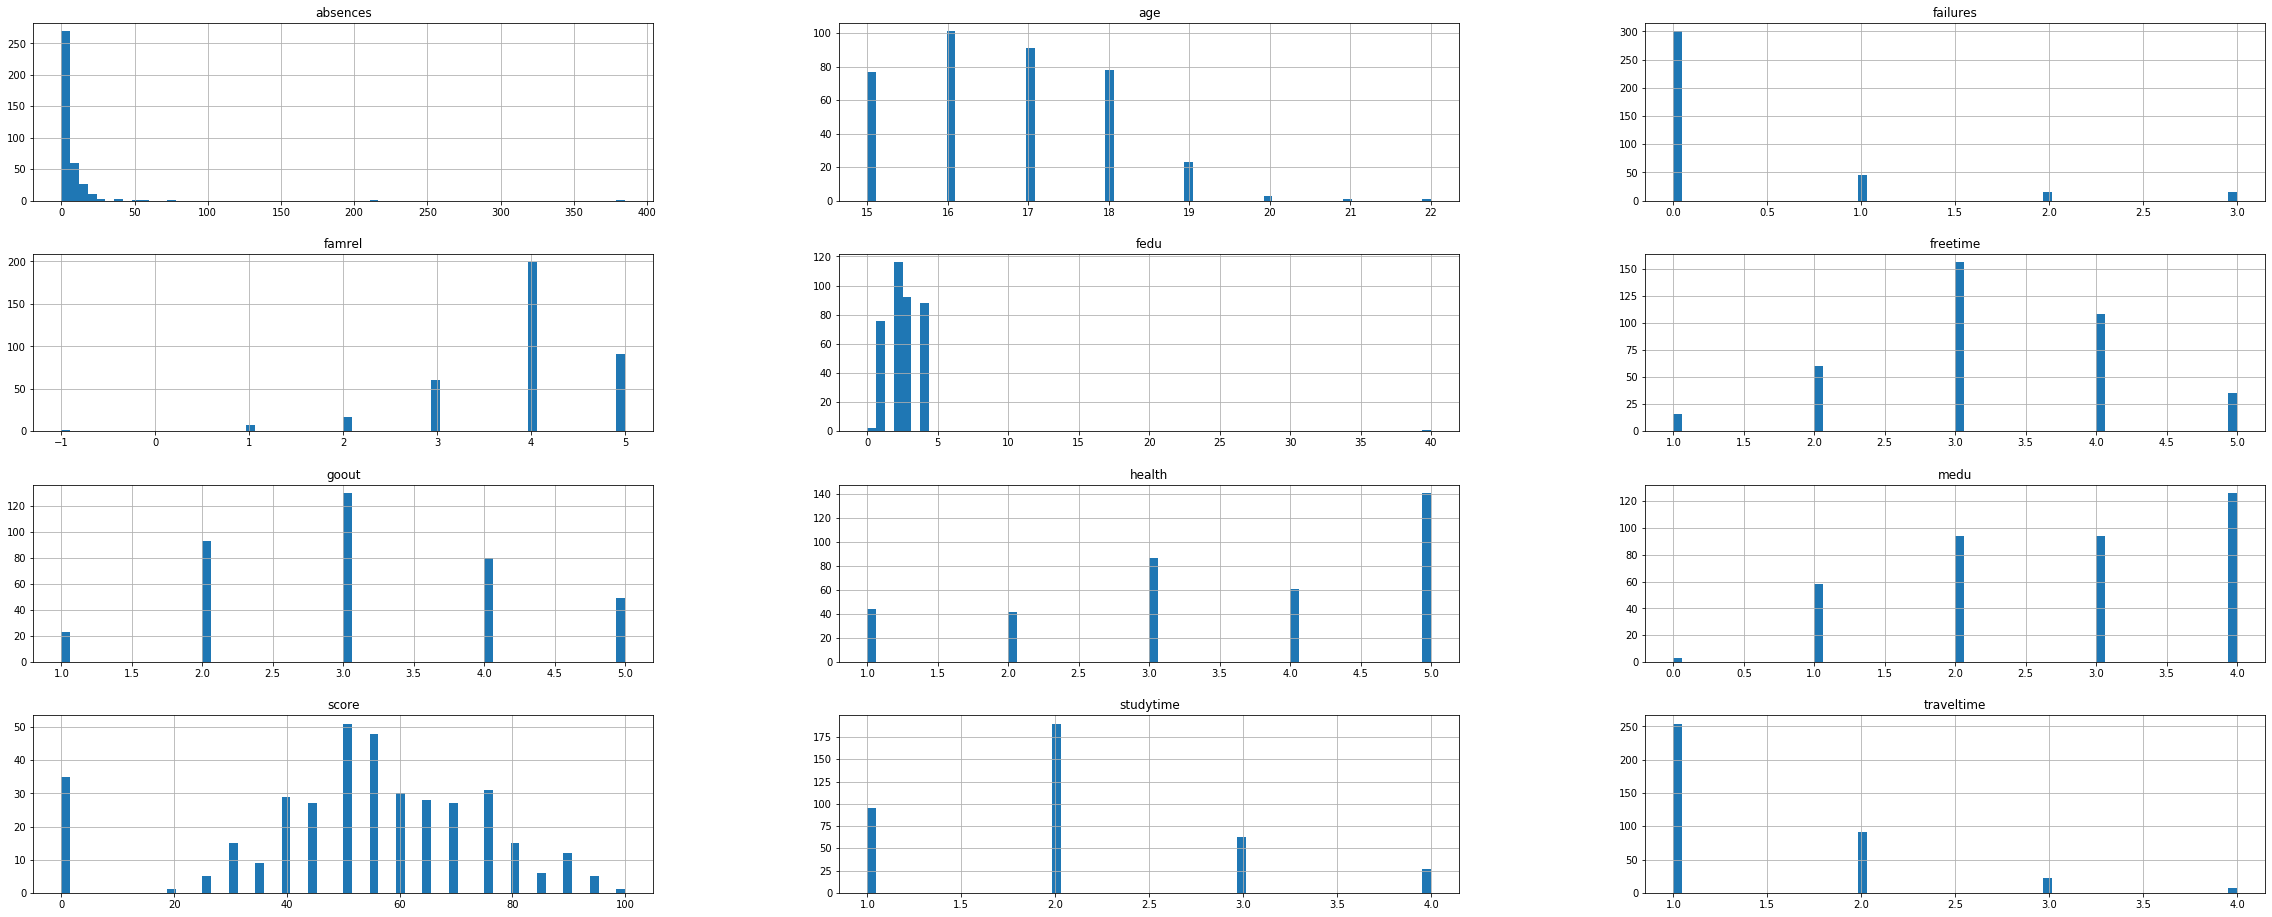

In [85]:
# Теперь посмотрим на гистограммы всех признаков:

stud_math.hist(figsize=(40, 16), grid=True, bins=64)

In [86]:
# Видим явные выбросы в столбце absences, а так же ошибочные данные 
# в столбцах famrel и fedu

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


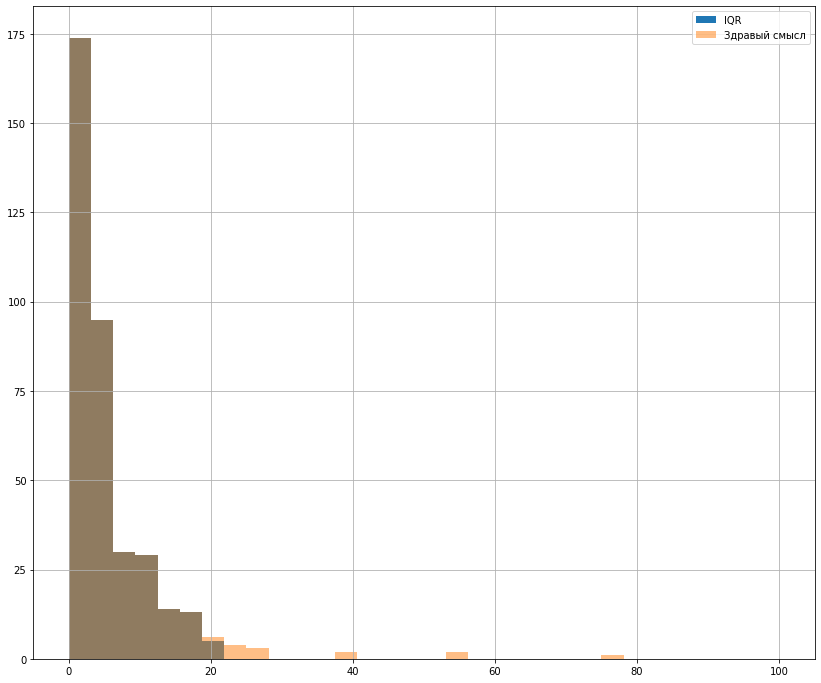

In [92]:
# Избавимся от выбросов в absences

perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
IQR = perc75 - perc25
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud_math.absences.loc[stud_math.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=32, range=(0, 100), label='IQR', figsize=(14, 12))
stud_math.absences.loc[stud_math.absences <= 100].hist(alpha = 0.5, bins = 32, range = (0, 100),
                                                        label = 'Здравый смысл')
plt.legend()

In [93]:
stud_math = stud_math[stud_math.absences <= 100]

In [94]:
stud_math.loc[:, ['absences']].describe()

,absences
count,373.000000
mean,5.624665
std,7.978374
min,0.000000
25%,0.000000
50%,4.000000
75%,8.000000
max,75.000000


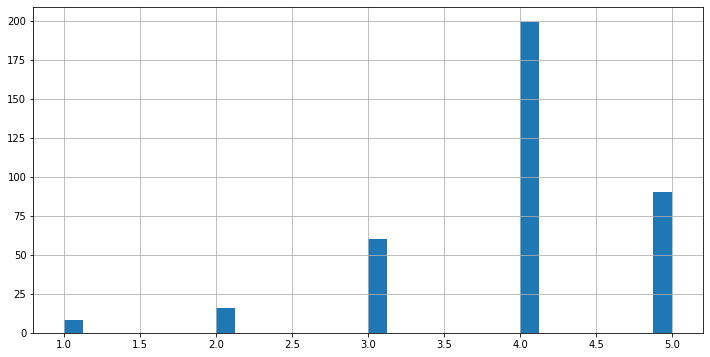

In [95]:
# Поправим данные в famrel

stud_math.famrel = stud_math.famrel.apply(lambda x: x*-1 if x < 0 else x)
stud_math.famrel.hist(grid=True, bins=32, figsize=(12, 6))

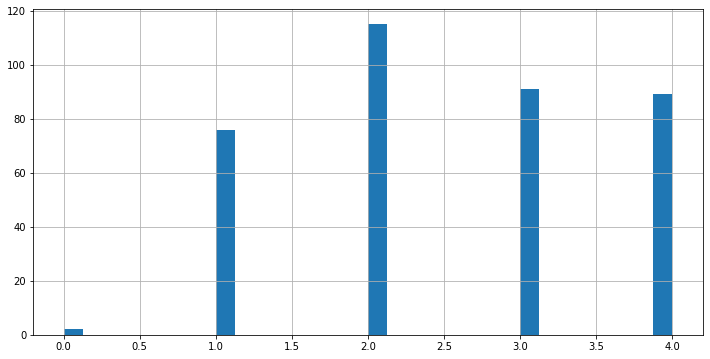

In [96]:
# Поправим данные в fedu

stud_math.fedu = stud_math.fedu.apply(lambda x: x/10 if x % 10 == 0 else x)
stud_math.fedu.hist(grid=True, bins=32, figsize=(12, 6))

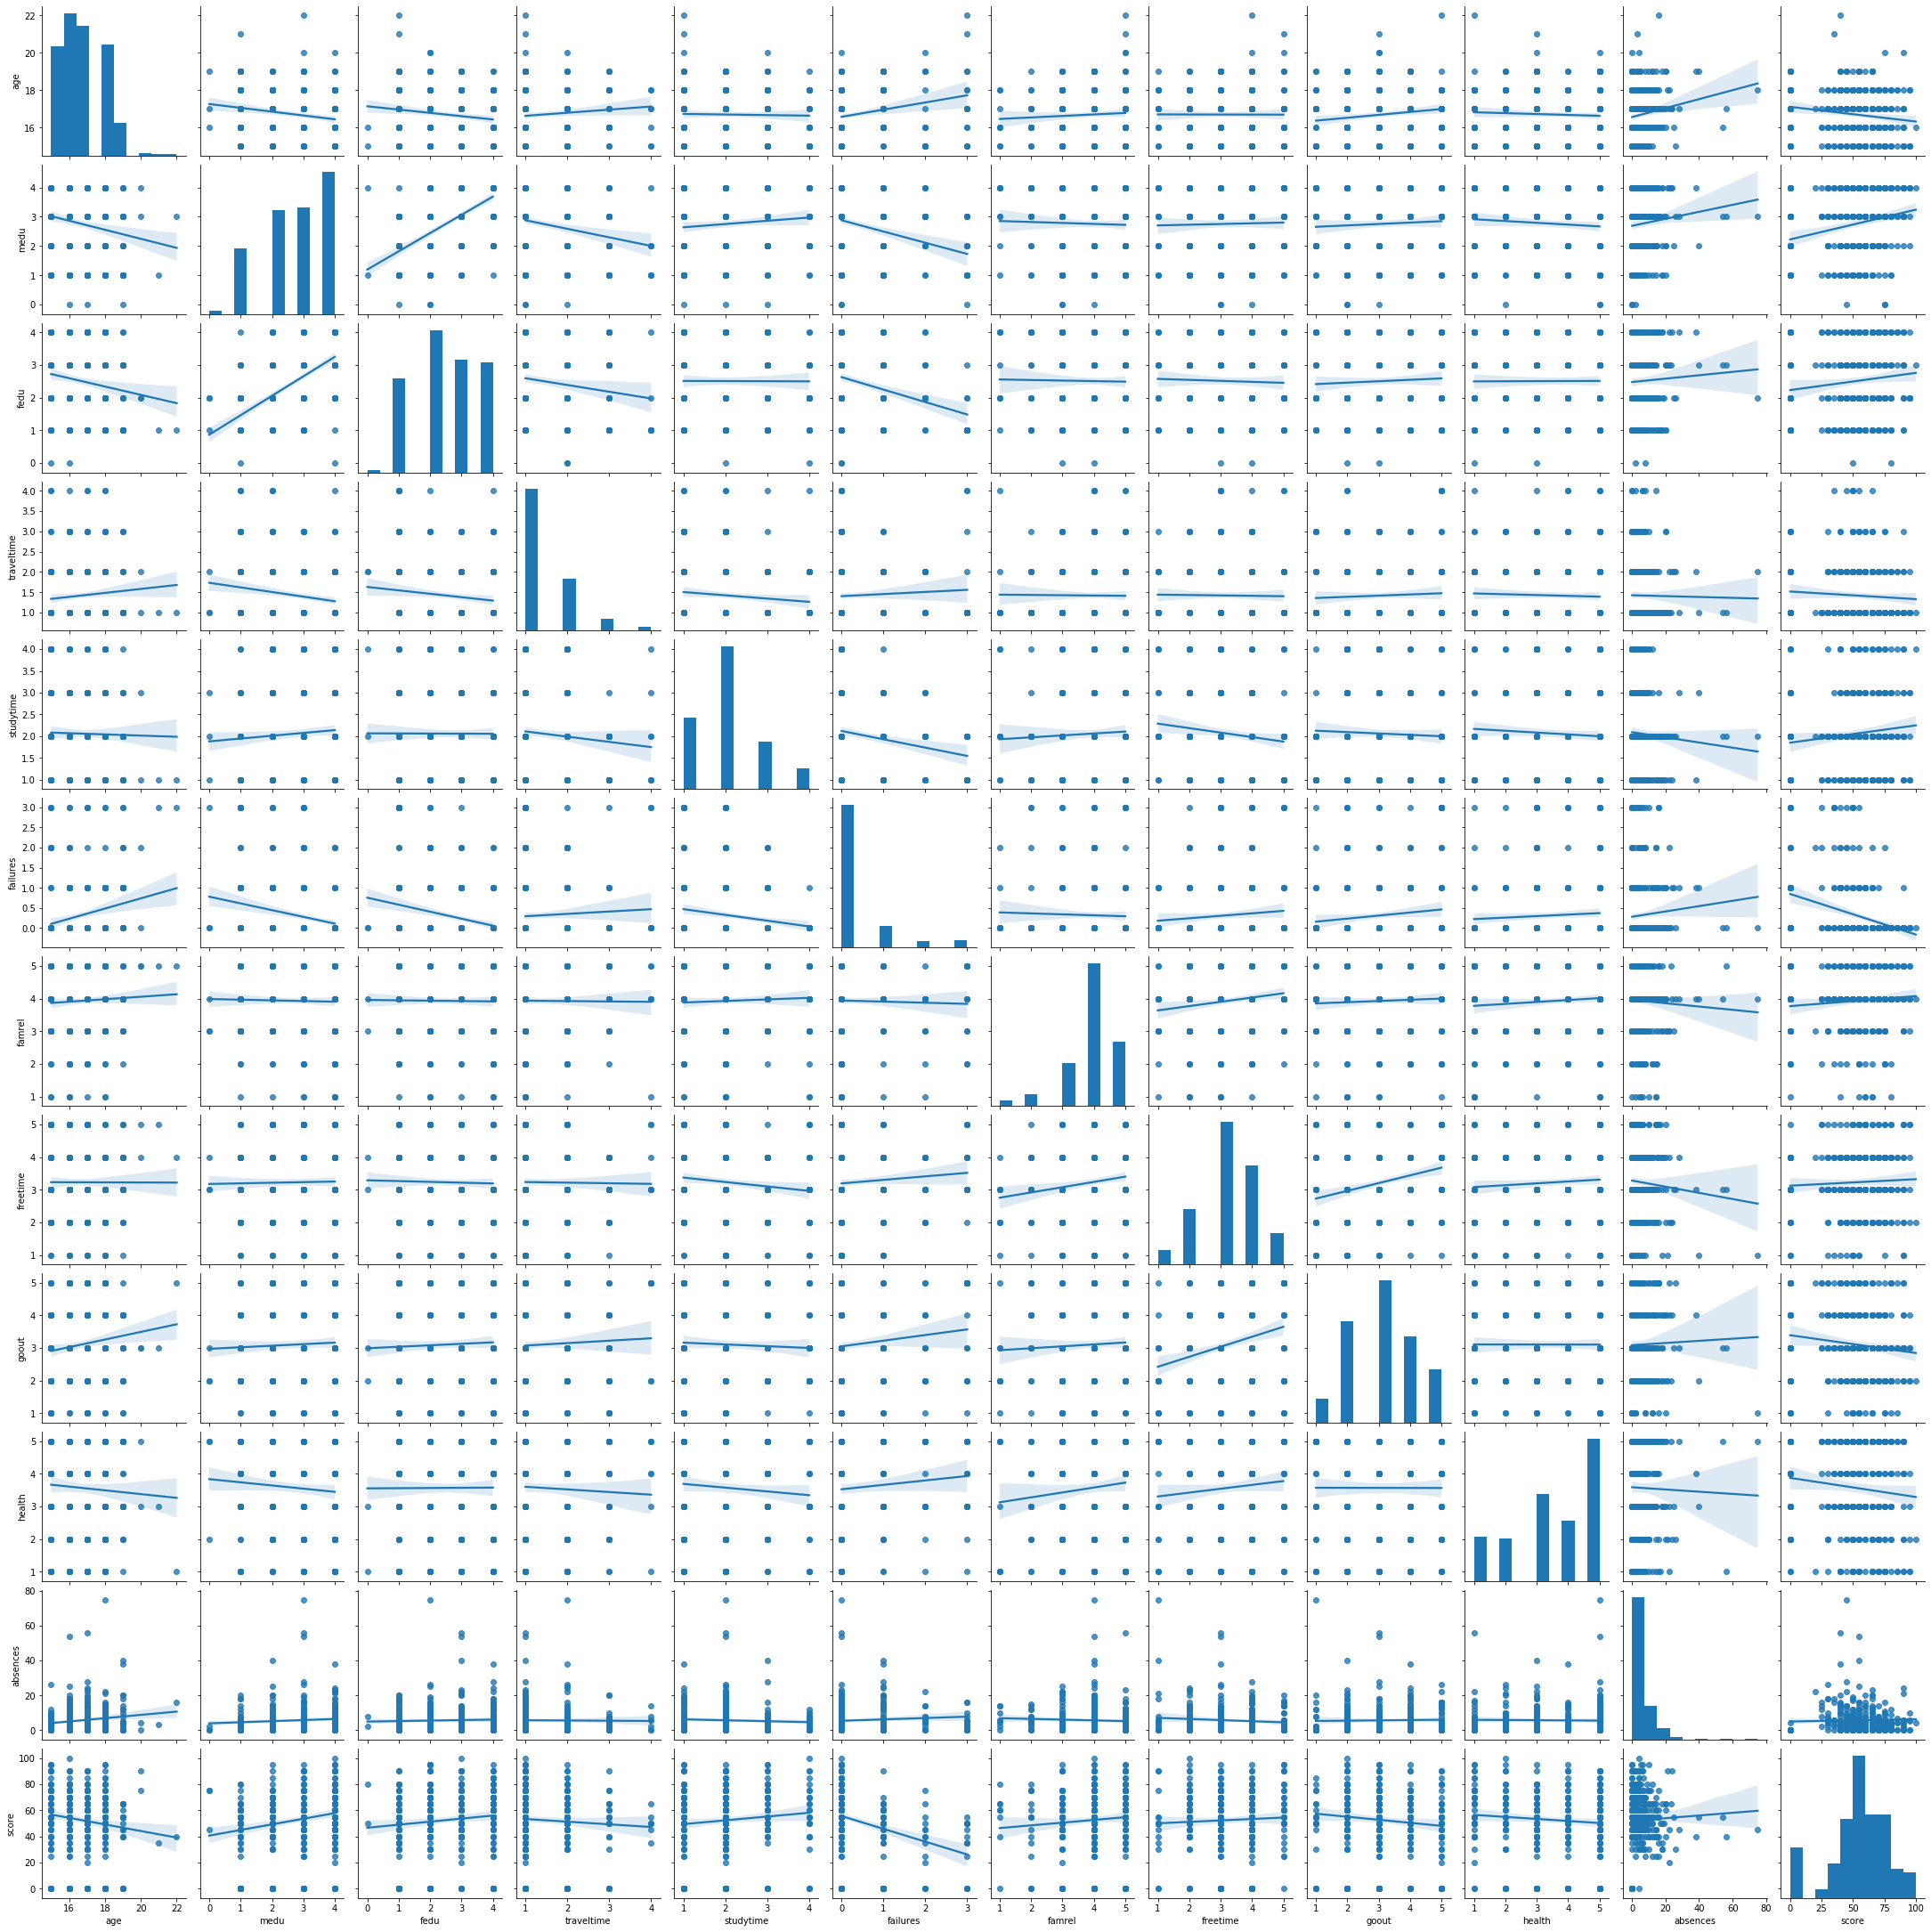

In [97]:
# Корреляционный анализ

sns.pairplot(stud_math, kind='reg')

In [98]:
# Посмотрим на количественные данные

stud_math[['age', 'absences', 'score']].corr()

,age,absences,score
age,1.000000,0.150719,-0.140953
absences,0.150719,1.000000,0.036100
score,-0.140953,0.036100,1.000000


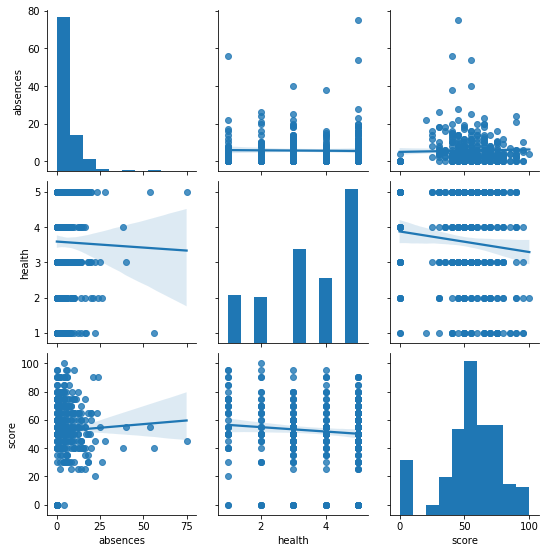

In [99]:
# Ученики, которые часто болеют и много пропускают занятия, по идее
# должны иметь ниже балл за итоговый тест, чем те дети, которые не
# пропускали занятия и уровень их здоровья выше. Чем чаще болеешь,
# тем чаще пропускаешь занятия. Посмотрим на этот фактор.

sns.pairplot(stud_math[['absences', 'health', 'score']], kind='reg')

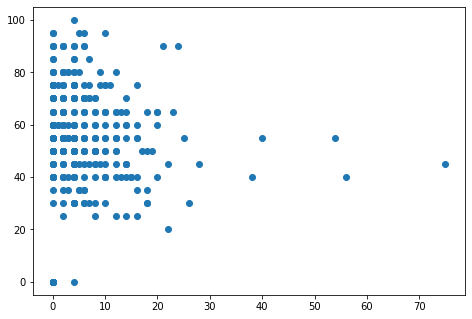

In [100]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = stud_math.absences, y = stud_math.score)

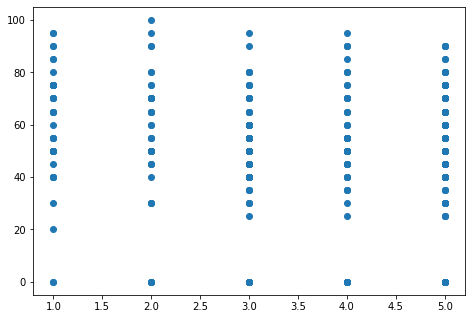

In [101]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = stud_math.health, y = stud_math.score)

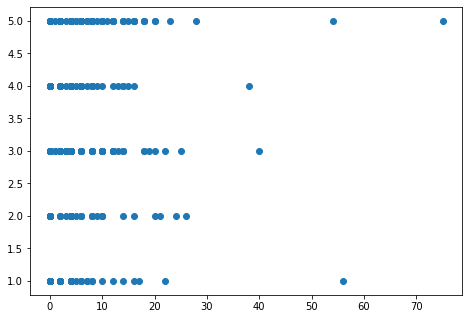

In [102]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = stud_math.absences, y = stud_math.health)

In [109]:
# А вот это уже очень интересно. Дети, которые много болели и много пропускали
# идут практически вровень с детьми, которые не болели и не пропускали занятия
# Делаем вывод, что данные собраны очень плохо. Не видно особой связи.
# Давайте взглянем на детей, получивших 0 баллов по итоговому тесту

stud_math[stud_math.score == 0][['health', 'score']].health.value_counts()

5.0    14
3.0     7
4.0     7
2.0     5
1.0     2
Name: health, dtype: int64

In [111]:
stud_math[stud_math.score == 0][['absences', 'score']].absences.value_counts()

0.0    34
4.0     1
Name: absences, dtype: int64

In [112]:
# Большая часть детей, с отличным здоровьем и не пропускающих заянятия детей
# не пришли на экзамен. Непонятно. Видимо, данные действительно собраны, мягко
# говоря, так себе. Может быть, лучшим вариантом было бы обе колонки исключить
# из датафрейма, но с другой стороны, это очень важные показатели.

In [113]:
# Строим боксплоты для качественных показателей

def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(9, 3))
    sns.boxplot(x=column, y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(
                    stud_math.loc[:, column].value_counts().index)],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

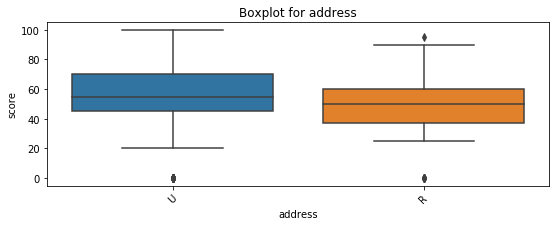

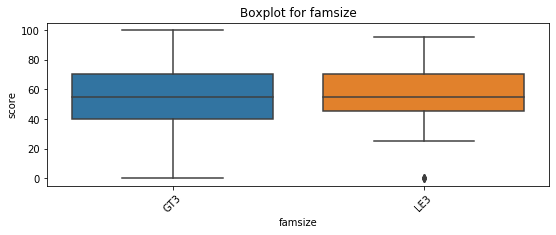

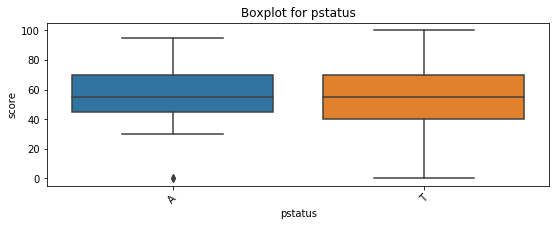

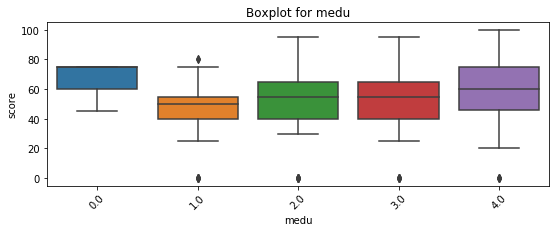

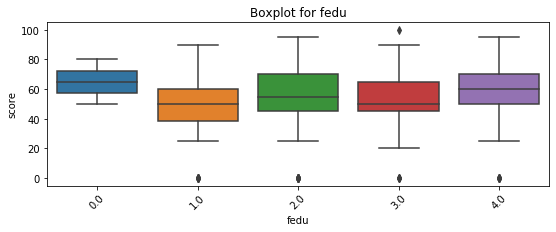

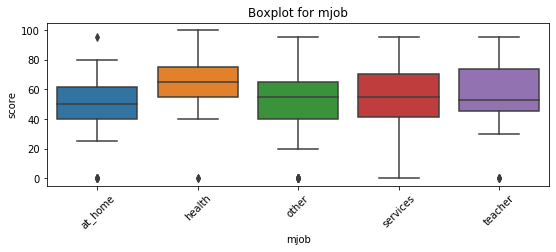

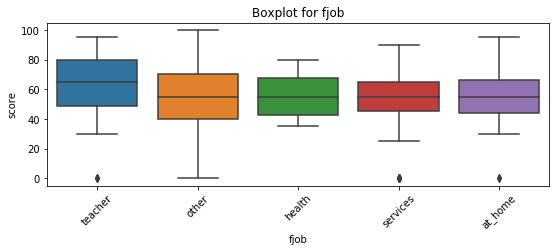

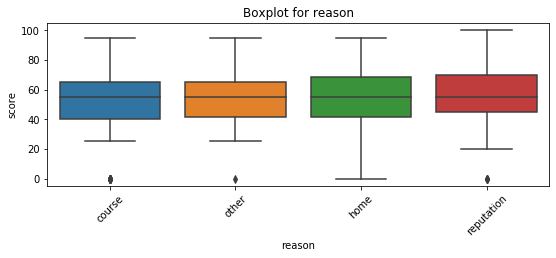

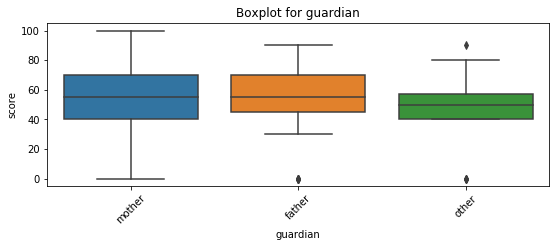

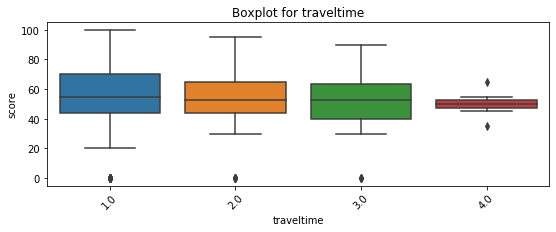

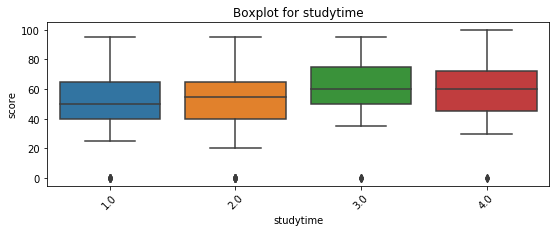

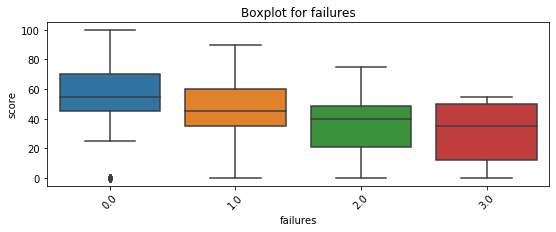

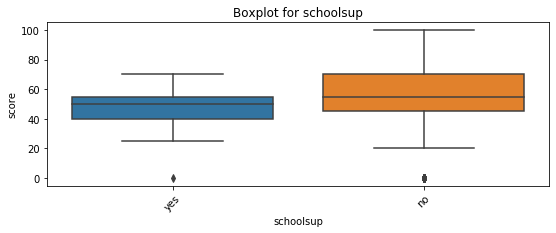

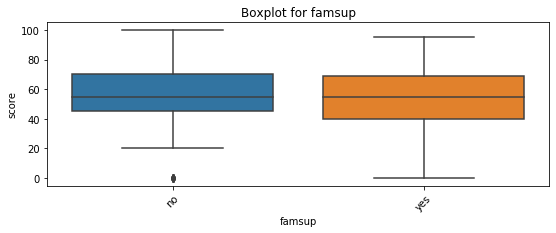

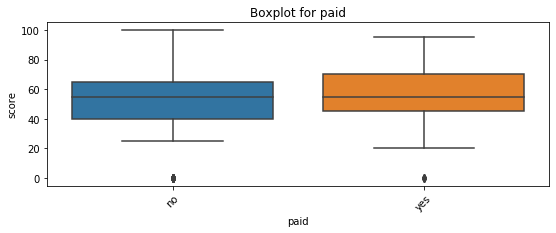

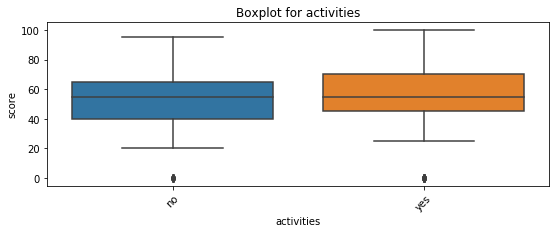

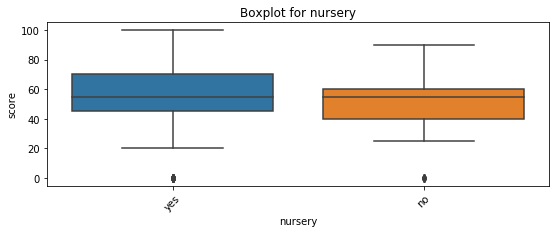

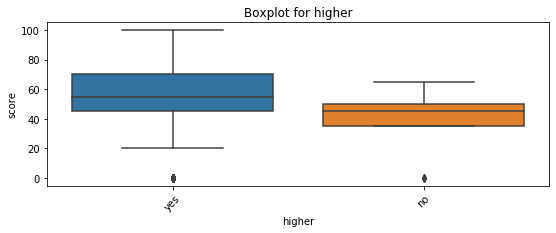

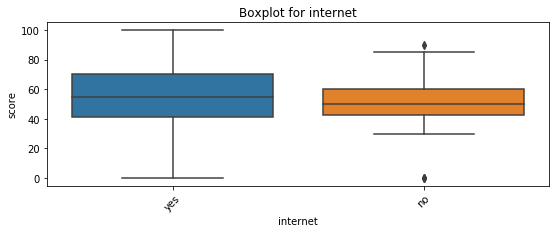

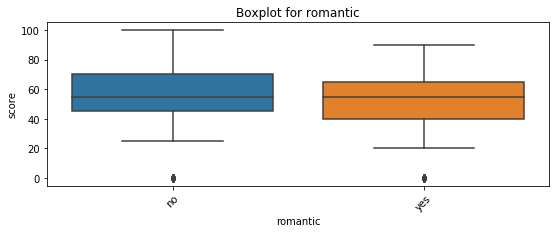

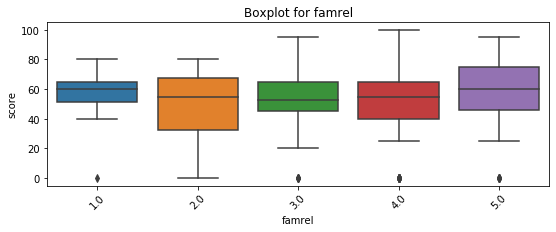

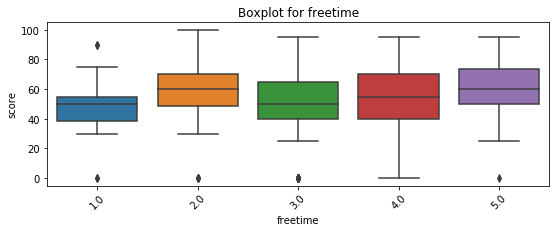

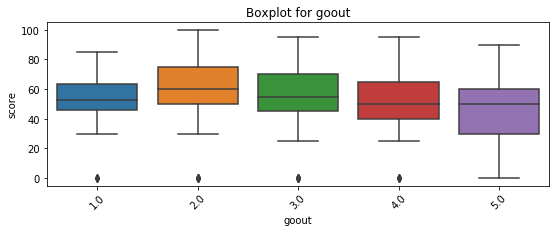

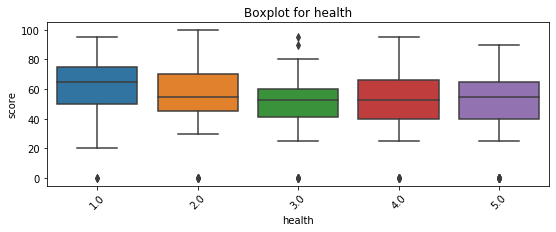

In [114]:
for col in ['address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 
            'fjob', 'reason', 'guardian', 'traveltime', 'studytime', 
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 
            'nursery', 'higher', 'internet', 'romantic', 'famrel', 
            'freetime', 'goout', 'health']:
    get_boxplot(col)

In [115]:
# Найдём статистически значимые различия для качественных показателей


def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [116]:
for col in ['address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 
            'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 
            'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 
            'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [34]:
# Видим, что для нас остались интересны только колонки medu, mjob, failures, schoolsup, 
# higher, romantic и две слабоскоррелированные количественные колонки absences и age. 
# Оставим их для дальнейшей модели.

In [117]:
stud_math_for_model = stud_math.loc[:, [
    'age', 'absences', 'medu', 'mjob', 'failures', 'schoolsup', 'higher', 'romantic', 'score']]
stud_math_for_model.head(10)

,age,absences,medu,mjob,failures,schoolsup,higher,romantic,score
0,18,6.0,4.0,at_home,0.0,yes,yes,no,30.0
1,17,4.0,1.0,at_home,0.0,no,yes,no,30.0
2,15,10.0,1.0,at_home,3.0,yes,yes,no,50.0
3,15,2.0,4.0,health,0.0,no,yes,yes,75.0
4,16,4.0,3.0,other,0.0,no,yes,no,50.0
5,16,10.0,4.0,services,0.0,no,yes,no,75.0
6,16,0.0,2.0,other,0.0,no,yes,no,55.0
7,17,6.0,4.0,other,0.0,yes,yes,no,30.0
8,15,0.0,3.0,services,0.0,no,yes,no,95.0
9,15,0.0,3.0,other,0.0,no,yes,no,75.0


**Выводы:**

По имеющимся данным, можно сказать, что собраны они плохо. Очень плохо. Если по многим колонкам датасета
мы это сказать не можем, то по очевидным параметрам (количество пропущенных занятий и состоянии здоровья
учеников) мы это можем сказать однозначно. И исправить эти данные не представляется возможным.